In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def data_generator(a,b,c):
  x = np.linspace(-5, 5, 50) 
  y = a*np.power(x,2)+b*x+ c
  return x,y

X,Y = data_generator(3,2,3)

In [3]:
print(X[0], " " , Y[0])

-5.0   68.0


In [4]:
def initialize_parameters():
    # Initializing Coefficients
    a= np.random.randint(0,100) * 0.01
    b = np.random.randint(0,100) * 0.01
    c = np.random.randint(0,100) * 0.01
    parameters = {
        "a" : a,
        "b" : b,
        "c" : c
    }
    return parameters

In [5]:
learning_rate = 0.001
epoch = 1000

In [6]:
def predict(x,parameters):
    a,b,c = parameters["a"],parameters["b"],parameters["c"]
    return (a*(x**2)+b*x+ c)

In [7]:
def gradient_descent(X,Y,parameters):
    grad_a,grad_b,grad_c = 0,0,0
    for i in range(0,X.shape[0]):
        error = predict(X[i],parameters) - Y[i] 
        grad_a += error * X[i]**2
        grad_b += error * X[i]
        grad_c += error 
    
    grad_a /= X.shape[0]
    grad_b /= X.shape[0]
    grad_c /= X.shape[0]

    grad = {
        "grad_a" : grad_a ,
        "grad_b" : grad_b ,
        "grad_c" : grad_c
    }

    return grad


In [8]:
def update_weights(parameters,grad, learning_rate):
    a,b,c = parameters["a"],parameters["b"],parameters["c"]
    a -= learning_rate * grad["grad_a"]
    b -= learning_rate * grad["grad_b"]
    c -= learning_rate * grad["grad_c"]

    updated_parameters = {
        "a" : a,
        "b" : b,
        "c" : c
    }
    return updated_parameters
    

In [9]:
def train(X,Y,learning_rate = 0.001 ,epoch = 100, iteration_data = False , param_data = False):
    initial_parameters = initialize_parameters()
    dataset_length = X.shape[0]
    epoch_error = []
    param_list = []
    for i in range(0,epoch+1):
        grad = gradient_descent(X,Y,initial_parameters)
        initial_parameters = update_weights(initial_parameters,grad,learning_rate)
        Y_hat =  (initial_parameters["a"] * X**2 + initial_parameters["b"] * X + initial_parameters["c"])
        total_error =  Y_hat - Y
        # Display current epoch and error
        cost_value = np.sum(total_error**2)/dataset_length
        if i%100 == 0 :
            print(f'Epoch {i}, Error: {cost_value}')
        epoch_error.append(cost_value)
        param_list.append(initial_parameters)

    print("\n")
    print("Training Completed, Final Parameters are : ")
    print(initial_parameters)
    
    if iteration_data and param_data :
        return initial_parameters, epoch_error, param_list
    elif iteration_data and not param_data :
        return initial_parameters, epoch_error
    elif param_data and not iteration_data:
        return initial_parameters,param_data
    else :
        return initial_parameters    

In [10]:
param, iteration_data, param_data = train(X,Y,learning_rate=0.001,epoch = 10,iteration_data = True,param_data = True )

Epoch 0, Error: 860.7347307128075


Training Completed, Final Parameters are : 
{'a': 2.544819875788591, 'b': 0.6370645718556179, 'c': 1.086740247466499}


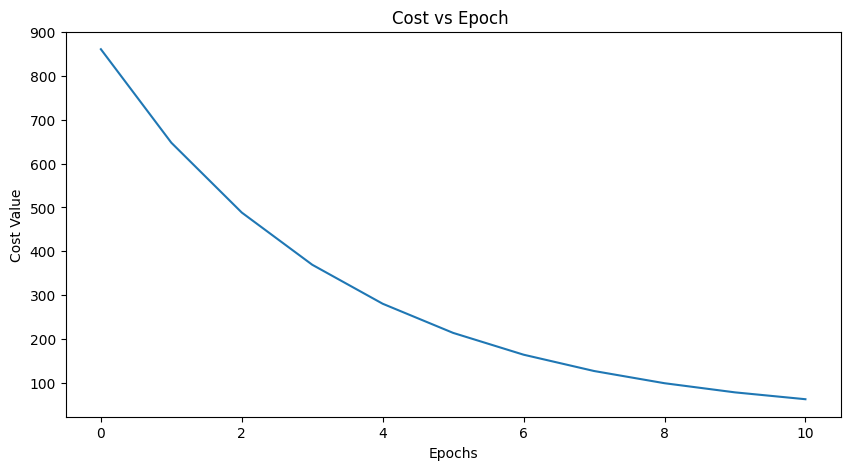

In [11]:
plt.figure(figsize= (10,5)) 
sns.lineplot(iteration_data)
plt.xlabel("Epochs")
plt.ylabel("Cost Value")
plt.title("Cost vs Epoch ")
plt.show()

In [12]:
def plot(X, Y, parameters):
    # Extracting parameters
    a, b, c = parameters["a"], parameters["b"], parameters["c"]
    
    # Plotting
    plt.scatter(X, Y, color='b')  # Plotting original data points
    plt.plot(X, a * X**2 + b * X + c, color='r', linewidth=1)  # Plotting fitted polynomial
    
    # Adding labels and title
    plt.title('Polynomial Fitting using Gradient Descent')
    plt.xlabel('x')
    plt.ylabel('y')
    
    # Adding legend and grid
    plt.legend(['Original Data', 'Fitted Polynomial'])
    plt.grid(True)
    
    # Displaying the plot
    plt.show()

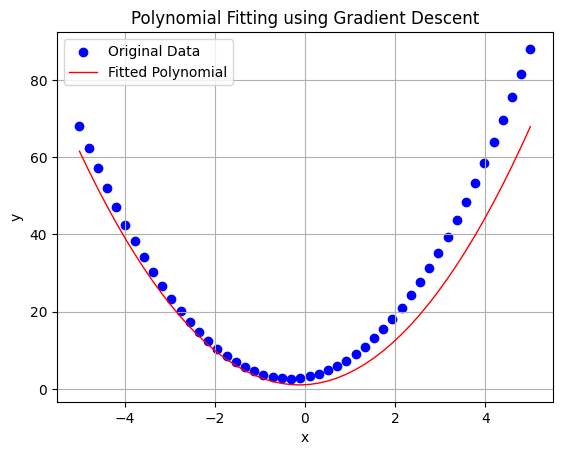

In [13]:
plot(X,Y,param)

In [22]:
 
# updating plot
def animation_plot(X,Y,param_data):
    for i in range(0,len(param_data)) :
        parameters = param_data[i]
        a, b, c = parameters["a"], parameters["b"], parameters["c"]
        # Plotting
        plt.scatter(X, Y, color='b')  # Plotting original data points
        plt.plot(X, a * X**2 + b * X + c, color='r', linewidth=1)  # Plotting fitted polynomial
        
        # Adding labels and title
        plt.title('Polynomial Fitting using Gradient Descent: Epoch ' +  str(i) )
        plt.xlabel('x')
        plt.ylabel('y')
        
        # Adding legend and grid
        plt.legend(['Original Data', 'Fitted Polynomial'])
        plt.grid(True)
        plt.show()
        plt.clf()
        

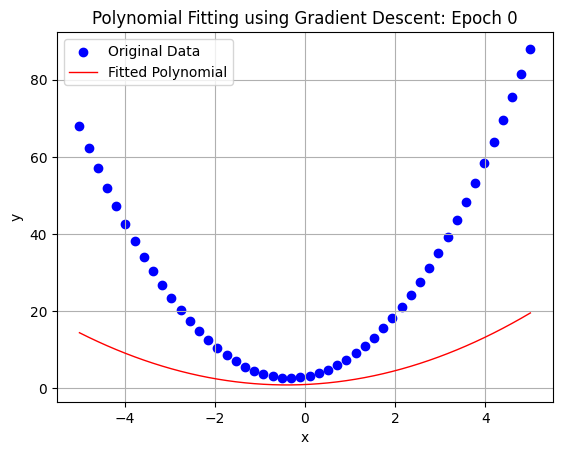

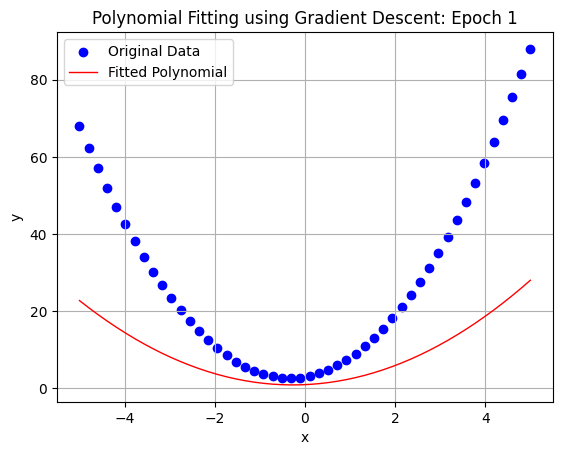

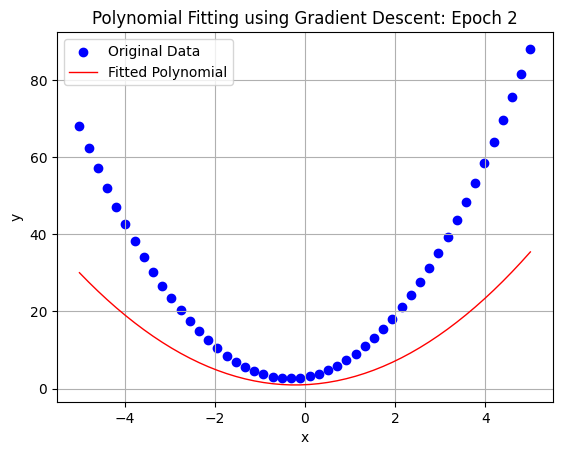

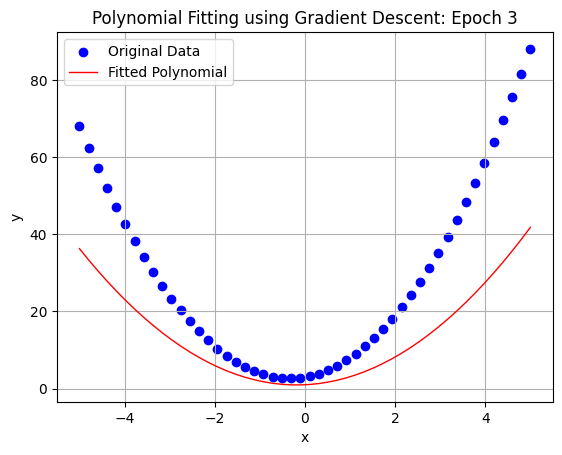

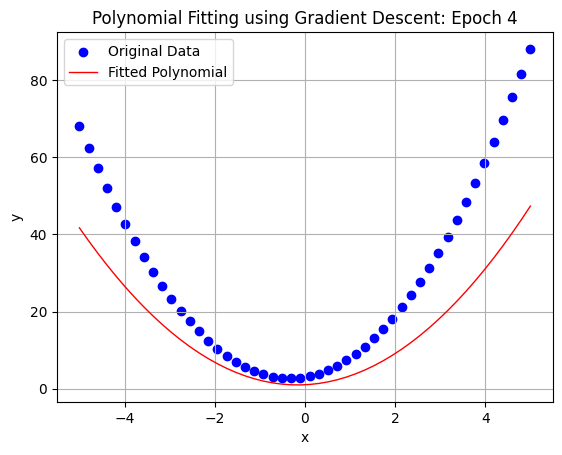

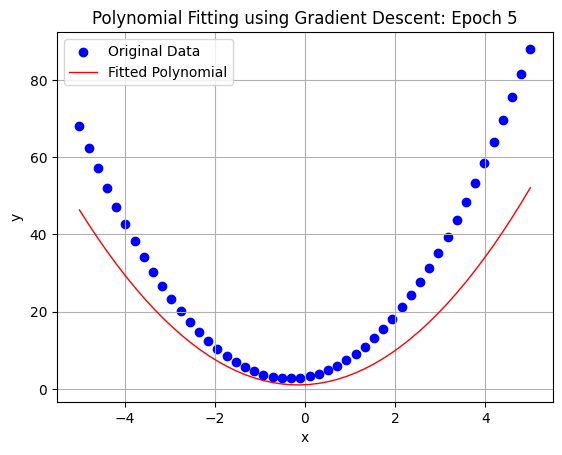

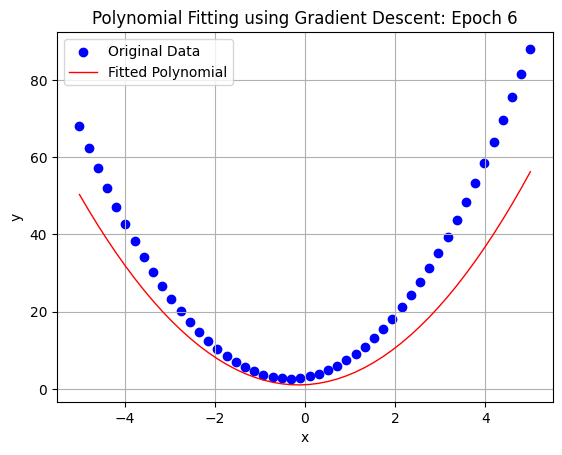

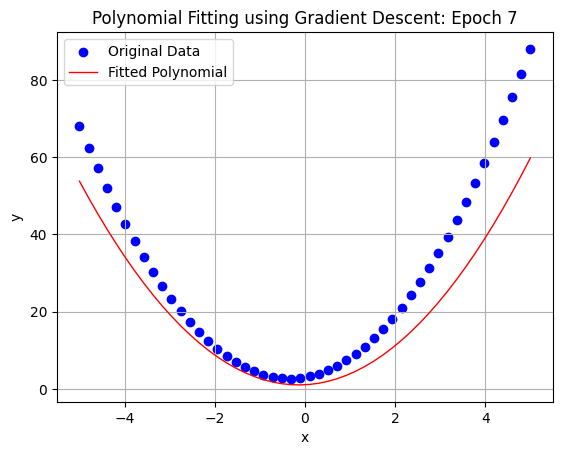

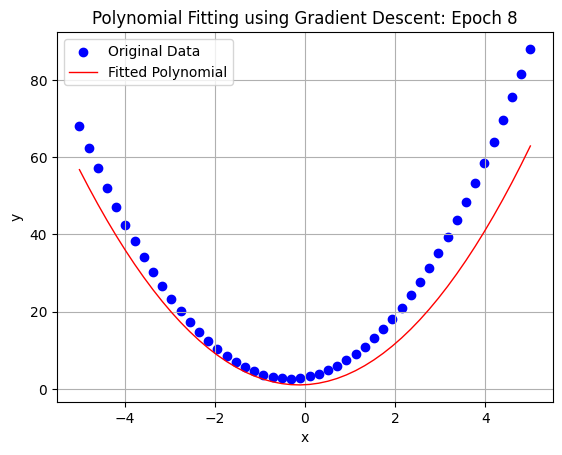

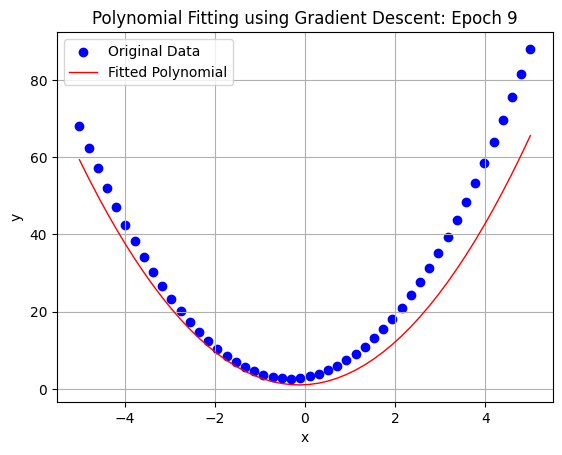

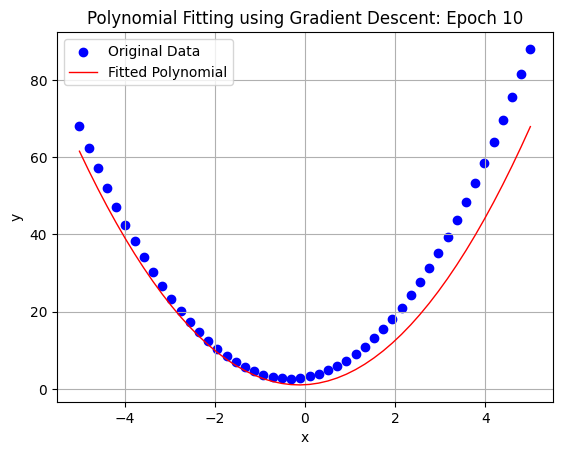

<Figure size 640x480 with 0 Axes>

In [23]:
animation_plot(X,Y,param_data)